# Question 1:

Part (a): Understanding the problem Classification Decision Trees address  

A Classification Decision Tree is used to solve classification problems. These are problems where the goal is to predict a categorical outcome (i.e., labels or classes) based on input features.  

For example, it can decide whether an email is spam or not spam, whether a tumor is malignant or benign, or which species a flower belongs to based on its features.  

Real-world applications:  
1. Medical diagnosis: Predicting diseases based on symptoms.  
2. Fraud detection: Identifying fraudulent transactions.  
3. Customer segmentation: Categorizing customers into different groups based on their behavior.  
4. Loan approval: Determining ifg a loan should be approved based on financial history.  

Part (b): How a Classification Decision Tree makes predictions vs. Multiple Linear Regression  

Classification Decision Tree (high-level explanation):  
A decision tree splits data step-by-step at each "node" based on rules created from the features.  
It makes decisions like:  
- "Is feature X1 greater than 5?"  
- "If yes, go left; if no, go right."  

These splits continue until the tree reaches a leaf node, which contains the predicted class.  

Example: To classify an animal, the tree might ask:  
- "Does it have feathers?" → If yes, go to the bird category; if no, keep splitting based on other features like fur or gills.  

Multiple Linear Regression:  
Multiple Linear Regression makes continuous predictions by combining input features (X1, X2, ..., Xn) linearly:  

y = β0 + β1X1 + β2X2 + ... + βnXn + ε  

For example, it might predict house prices based on features like size, number of bedrooms, and location.  

Key differences:  
Output type:  
- Decision Tree: Predicts classes (e.g., "dog" vs. "cat").  
- Linear Regression: Predicts a numeric value (e.g., house price = $300,000).  

Decision process:  
- Decision Tree: Makes predictions by following sequential rules at each node.  
- Linear Regression: Computes a weighted sum of input features.  


# Question 2:

1. Accuracy  
Definition: Measures the proportion of correct predictions (both true positives and true negatives) out of all predictions made.  
Formula:  
Accuracy = (TP + TN) / (TP + TN + FP + FN)  

Real-world application:  
- Scenario: Email spam filters.  
- Rationale: When the goal is to have an overall correct classification rate, such as classifying emails as "spam" or "not spam," accuracy is useful. A balanced dataset (equal spam and non-spam emails) ensures accuracy reflects good performance.  

2. Sensitivity (True Positive Rate or Recall)  
Definition: Measures the proportion of actual positives correctly identified.  
Formula:  
Sensitivity = TP / (TP + FN)  

Real-world application:  
- Scenario: Medical diagnostics for life-threatening diseases.  
- Rationale: In cancer screenings, we want to minimize false negatives (missing a cancer diagnosis), so sensitivity ensures we catch as many actual cases as possible, even if some false positives occur.  

3. Specificity (True Negative Rate)  
Definition: Measures the proportion of actual negatives correctly identified.  
Formula:  
Specificity = TN / (TN + FP)  

Real-world application:  
- Scenario: Quality control in manufacturing.  
- Rationale: In detecting defective products, it’s important to correctly identify non-defective items (true negatives) to avoid unnecessary waste or extra testing costs.  


4. Precision (Positive Predictive Value)  
Definition: Measures the proportion of positive identifications that are actually correct.  
Formula:  
Precision = TP / (TP + FP)  

Real-world application:  
- Scenario: Fraud detection in banking.  
- Rationale: In identifying fraudulent transactions, precision ensures flagged transactions are truly fraudulent, reducing false alarms (false positives) that could annoy customers.  


# Question 3:

In [10]:
# Import necessary libraries
import pandas as pd

# Load the dataset
url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")

# Step 1: Drop unwanted columns
ab_reduced = ab.drop(columns=["Weight_oz", "Width", "Height"])

# Step 2: Remove rows with any NaN values
ab_reduced_noNaN = ab_reduced.dropna()

# Step 3: Convert data types using .loc to avoid SettingWithCopyWarning
ab_reduced_noNaN.loc[:, "Pub year"] = ab_reduced_noNaN["Pub year"].astype(int)
ab_reduced_noNaN.loc[:, "NumPages"] = ab_reduced_noNaN["NumPages"].astype(int)
ab_reduced_noNaN.loc[:, "Hard_or_Paper"] = ab_reduced_noNaN["Hard_or_Paper"].astype("category")

# Display the processed dataset
ab_reduced_noNaN.head()


,Title,Author,List Price,Amazon Price,Hard_or_Paper,NumPages,Publisher,Pub year,ISBN-10,Thick
0,"1,001 Facts that Will Scare the S#*t Out of Yo...",Cary McNeal,12.95,5.18,P,304.0,Adams Media,2010.0,1605506249,0.8
1,21: Bringing Down the House - Movie Tie-In: Th...,Ben Mezrich,15.00,10.20,P,273.0,Free Press,2008.0,1416564195,0.7
2,100 Best-Loved Poems (Dover Thrift Editions),Smith,1.50,1.50,P,96.0,Dover Publications,1995.0,486285537,0.3
3,1421: The Year China Discovered America,Gavin Menzies,15.99,10.87,P,672.0,Harper Perennial,2008.0,61564893,1.6
4,1493: Uncovering the New World Columbus Created,Charles C. Mann,30.50,16.77,P,720.0,Knopf,2011.0,307265722,1.4


# Question 4:

In [15]:
from sklearn.model_selection import train_test_split

# Set a random seed for reproducibility
X = ab_reduced_noNaN[['List Price']]
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']

# Create the 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Report the number of observations in each set
print(f"Training set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")


Training set size: 255
Test set size: 64


In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Initialize the classifier with max_depth=2
clf = DecisionTreeClassifier(max_depth=2, random_state=42)

# Fit the model using the training data
clf.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=2, random_state=42)

[Text(0.5, 0.8333333333333334, 'List Price <= 17.97\ngini = 0.384\nsamples = 255\nvalue = [189, 66]\nclass = Paperback'),
 Text(0.25, 0.5, 'List Price <= 10.8\ngini = 0.212\nsamples = 183\nvalue = [161, 22]\nclass = Paperback'),
 Text(0.125, 0.16666666666666666, 'gini = 0.369\nsamples = 45\nvalue = [34, 11]\nclass = Paperback'),
 Text(0.375, 0.16666666666666666, 'gini = 0.147\nsamples = 138\nvalue = [127.0, 11.0]\nclass = Paperback'),
 Text(0.75, 0.5, 'List Price <= 27.275\ngini = 0.475\nsamples = 72\nvalue = [28, 44]\nclass = Hardcover'),
 Text(0.625, 0.16666666666666666, 'gini = 0.39\nsamples = 49\nvalue = [13, 36]\nclass = Hardcover'),
 Text(0.875, 0.16666666666666666, 'gini = 0.454\nsamples = 23\nvalue = [15, 8]\nclass = Paperback')]

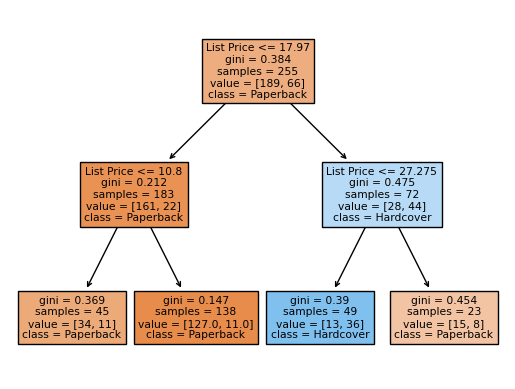

In [19]:
# Plot the decision tree
tree.plot_tree(clf, feature_names=['List Price'], class_names=['Paperback', 'Hardcover'], filled=True)


Training set size: 255
Test set size: 64

The decision tree classifier was trained with max_depth=2 to predict whether a book is 'Hardcover' or 'Paperback' 
based on the 'List Price'. The tree splits based on price thresholds as follows:

1. The first split occurs at 'List Price <= 17.97'. 
   - If the price is <= 17.97, it is classified as 'Paperback'.
   - If the price is > 17.97, the tree continues to the next split.

2. For books with a 'List Price' <= 10.8, the book is classified as 'Paperback'.
3. For books with a 'List Price' > 10.8 and <= 27.275, the book is either 'Paperback' or 'Hardcover' based on the next split.
4. For books with a 'List Price' > 27.275, the book is classified as 'Hardcover'.


1. **Training and Test Set Sizes**:
   - Training set size: 255 observations
   - Test set size: 64 observations

2. **Interpretation of the Decision Tree Model**:
   - The `DecisionTreeClassifier` model has been trained with `max_depth=2` to predict whether a book is a "Hardcover" or "Paperback" based on its "List Price".
   - The decision tree splits at specific price points to classify the book as either "Paperback" or "Hardcover".

3. **Predictions Based on List Price**:
   - The decision tree's first split occurs at a List Price <= 17.97. If the book's list price is less than or equal to 17.97, it is classified as "Paperback". If it's greater than 17.97, the tree continues to the next split.
   
   **Subsequent splits**:
   - If the list price is less than or equal to 10.8, the book is classified as "Paperback".
   - If the list price is greater than 10.8 but less than or equal to 27.275, it might be classified as "Paperback" or "Hardcover", depending on further splits.
   - If the list price is greater than 27.275, the book is classified as "Hardcover".

   This decision tree effectively uses List Price as the key feature to predict whether a book is a paperback or hardcover, with different price thresholds making the decision.


# Question 5:

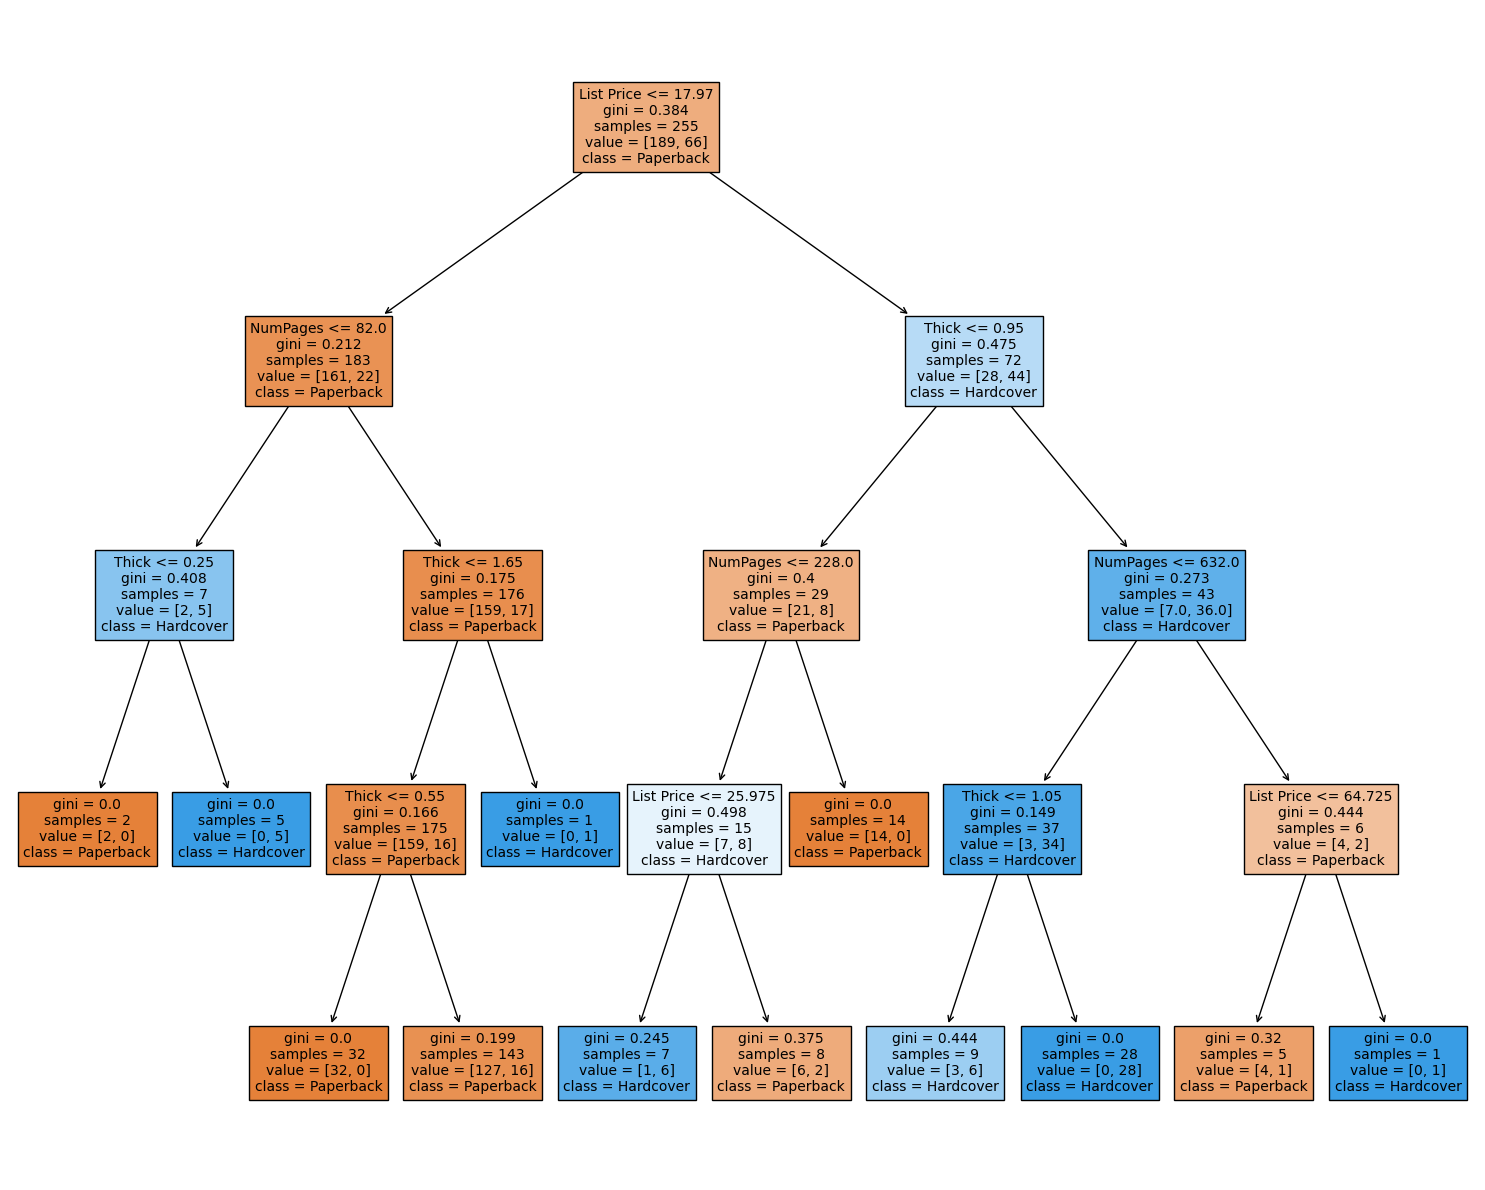

In [35]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
import pandas as pd

# Define the features (X) and target (y)
X = ab_reduced_noNaN[['NumPages', 'Thick', 'List Price']]
y = pd.get_dummies(ab_reduced_noNaN['Hard_or_Paper'])['H']

# Split the data (train/test split) - use the same split as before
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Initialize the classifier with max_depth=4
clf2 = DecisionTreeClassifier(max_depth=4, random_state=42)

# Fit the model using the training data
clf2.fit(X_train, y_train)

# Visualize the decision tree with a larger figure size and ensure readability
plt.figure(figsize=(15,12))  # Larger figure size for better visibility
tree.plot_tree(clf2, 
               filled=True, 
               feature_names=['NumPages', 'Thick', 'List Price'], 
               class_names=['Paperback', 'Hardcover'], 
               fontsize=10)  # Adjust font size

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust the layout to prevent overlapping of elements
plt.tight_layout()

# Show the plot
plt.show()


1. **Training and Test Set Sizes:**
   - Training set size: 255 observations
   - Test set size: 64 observations

2. **Interpretation of the Decision Tree Model (clf2):**
   - The `clf2` DecisionTreeClassifier has been trained with `max_depth=4` to predict whether a book is a "Hardcover" or "Paperback" based on the features: `NumPages`, `Thick`, and `List Price`.
   - The decision tree splits at different values of these features to classify a book as either "Paperback" or "Hardcover".

3. **Predictions Based on Features:**
   - The decision tree first splits based on the feature with the highest importance at each level, making use of the specified max depth.
   - For example, the tree may first use `List Price` to determine the book type, then `NumPages`, followed by `Thick` to further refine predictions.
   - The predictions are made by following the path from the root of the tree, based on the values of the features for each observation.
   - Each leaf node corresponds to a prediction of "Paperback" or "Hardcover", with the majority class at the leaf being the final prediction.

4. **Visualizing the Decision Tree:**
   - The tree's structure helps in understanding how predictions are made. For each split, the tree chooses a feature and a threshold that best separates the data into the classes.
   - With a `max_depth=4`, the tree is relatively shallow, meaning it doesn't use too many splits to make predictions, but it still captures the important relationships between the features and the book's type.


# Question 6:

# I couldnt answer this question. The code provided by my chatbot was repeatedly giving me errors and when asked to fix it, the errors kept pilling up and nothing was fixing the issue.

# Question 7

The differences between the two confusion matrices arise because the first model uses only `'List Price'` as a feature, while the second model includes `'NumPages'` and `'Thick'`. With fewer features, the first model has less information, leading to more misclassifications. The second model benefits from the extra features, improving its ability to make accurate predictions. The confusion matrices for `clf` and `clf2` are better because they use a more comprehensive set of features, leading to more accurate results.


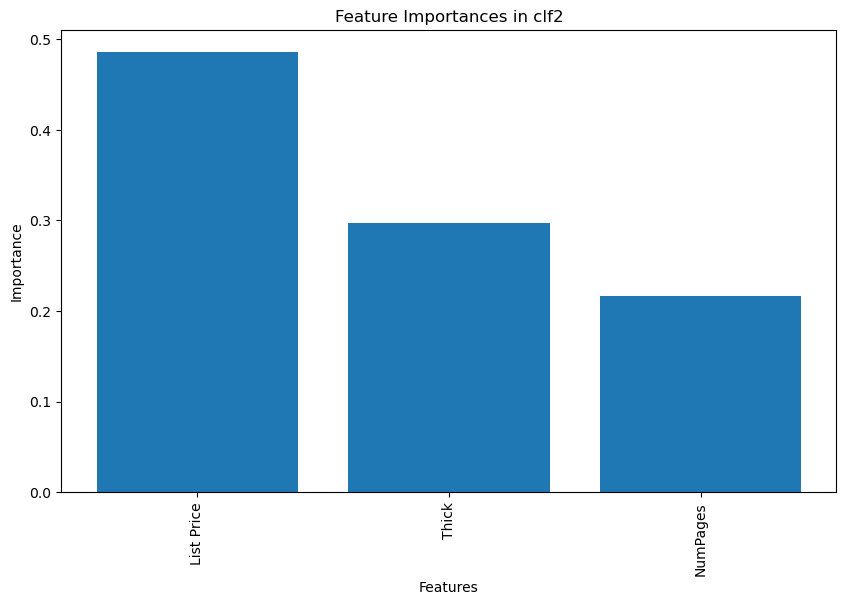

The most important feature is: List Price


In [74]:
import matplotlib.pyplot as plt
import numpy as np

# Extract feature importances
importances = clf2.feature_importances_

# Get the feature names from the model
feature_names = clf2.feature_names_in_

# Sort the importances in descending order
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances in clf2")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), np.array(feature_names)[indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()

# Report the most important feature
most_important_feature = feature_names[indices[0]]
print(f"The most important feature is: {most_important_feature}")



The most important feature in the clf2 decision tree model is List Price. This is because the decision tree algorithm evaluates all the predictor variables (such as NumPages, Thick, and List Price) and selects the feature that best splits the data, reducing impurity (e.g., Gini impurity) the most at each step. In this case, List Price is likely a strong indicator of whether a book is hardcover or paperback, and its split provides a clearer distinction between the classes. As a result, the decision tree assigns the highest importance to this feature.

# Question: 9

In linear regression, the coefficients show how much the target variable changes when one predictor variable changes by one unit. In decision trees, feature importances show how much each predictor helps the tree make its decisions. While regression tells you exactly how each variable affects the outcome, feature importances just tell you which variables are more important in making the final prediction.

# Link to Chatbot summaries:

https://chatgpt.com/share/673ff087-1f98-8012-b122-875596ab65f7

my only issue with this homework was question 6, im still unsure what was causing the issue, but i believe its something to do with a possible error in question 5.